In [1]:
binary.glist<- readRDS('../dat/1901/binary.glist.Rds')

In [14]:
t(lapply(binary.glist,length))

alpha1_tr,alpha1,alpha2,alpha2_tr,beta1_tr,beta1,beta2,beta2_tr
194,186,2071,2160,186,181,703,721


## 1. EnrichR


In [3]:
require(enrichR)
require(tidyverse)
dbs <- listEnrichrDbs()
dbs%>% filter(grepl('KEGG',libraryName) | grepl("GO_Biological_Process",libraryName))

libraryName,numTerms,geneCoverage,genesPerTerm,link
KEGG_2013,200,4128,48,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2015,5192,14264,58,http://www.geneontology.org/GO.downloads.annotations.shtml
GO_Biological_Process_2013,941,7682,78,http://www.geneontology.org/GO.downloads.annotations.shtml
KEGG_2015,179,3800,48,http://www.kegg.jp/kegg/download/
KEGG_2016,293,7010,87,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2017,3166,13822,21,http://www.geneontology.org/
GO_Biological_Process_2017b,10125,13247,49,http://www.geneontology.org/
GO_Biological_Process_2018,5103,14433,36,http://www.geneontology.org/


In [5]:
go.res <- list()
for(i in c("alpha1","alpha2","beta1","beta2")){
    go.res[[i]] <- enrichr(binary.glist[[i]], "GO_Biological_Process_2018")
}


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


### Top 5 combined scores

In [13]:
head(go.res$alpha1$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(go.res$alpha2$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(go.res$beta1$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(go.res$beta2$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),7/74,5.717295e-06,0.0020410744,9.401192e-06,0.003356225,-1.840800,22.22216,NEUROD1;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
white fat cell differentiation (GO:0050872),2/7,1.751962e-03,0.2353312807,2.898441e-03,0.320606911,-3.000250,19.04264,CTBP2;CTBP1
regulation of protein secretion (GO:0050708),9/108,7.599379e-07,0.0008138935,1.285033e-06,0.001376270,-1.270394,17.89988,NEUROD1;RFX6;RSAD2;ABCC8;GCG;KCNA5;GCK;SYT7;LLGL2
atrial cardiac muscle cell to AV node cell signaling (GO:0086026),2/9,2.966780e-03,0.2444170150,4.375111e-03,0.320606911,-2.877708,16.74906,ANK2;KCNA5
positive regulation of ion transmembrane transporter activity (GO:0032414),3/24,1.387216e-03,0.2353312807,1.894135e-03,0.320606911,-2.492244,16.40010,ANK2;PDZK1;ATP1B1
regulation of organ growth (GO:0046620),2/10,3.685845e-03,0.2599708060,5.218616e-03,0.320606911,-2.905380,16.27959,WWC1;SLC6A4


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
"regulation of transcription, DNA-templated (GO:0006355)",228/1599,1.908938e-07,2.229865e-04,5.048987e-05,0.03090201,-1.835439,28.39709,RB1;SMARCB1;EHMT1;JMJD1C;GPATCH3;BACH1;RPL6;UBE2L3;ELK4;PSMD9;ZNF609;TRIM28;KAT5;GPBP1;EPC1;EPC2;JUNB;ATXN7L3;HES6;SMARCC1;SFMBT1;DAPK3;SOX12;KARS;THAP7;DDIT3;RFX5;ANKRA2;ATF3;ATF4;L3MBTL1;CASZ1;ZNF274;SET;DHX9;CTBP1;EPAS1;TSHZ1;ZNF24;ZBTB4;DEDD2;ZNHIT3;NUP85;HIVEP3;PATZ1;ZNF148;PPARGC1A;ZBED4;ABCA2;CREBBP;XRCC6;JUND;NFATC3;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;SNAI1;MMS19;FANK1;CDKN1A;GMEB2;BHLHE41;RSF1;CTCF;AATF;GLI3;MECP2;CHMP1A;HEY2;UIMC1;JARID2;CIC;TEAD1;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;NCOA4;PROX1;BAZ1A;FOS;MED26;TOX3;SLTM;MED20;RARA;MAPRE3;JDP2;PCNA;MYCBP;RELA;CUX1;NFIL3;CREG1;NSD1;UBN1;HSF4;ZIM2;BRD4;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;CENPF;RYBP;NFIA;FOSB;CTNNB1;KIAA1958;CDK5R1;FOXA1;ZNF571;PRDM2;RORA;NR3C1;YY1;FOXQ1;ZNF84;SCMH1;ZNF207;MAP3K5;PITX3;PIAS4;MAP2K1;ZGPAT;FBXW11;USP3;POU3F1;ILF2;POU3F2;FOXP1;PIAS1;NPAS4;DGKQ;ZNF674;KHDRBS1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;PHF21B;SBNO1;RAI1;ATXN1;DVL1;BPTF;ESRRA;ZNF540;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;DENND4A;HMGA1;INHBA;SMAD5;NFKB2;BMP2;GCLC;CNOT7;COPS2;CNOT2;RFXAP;BHLHE40;CNOT8;ZNF775;NFE2L1;RNF10;LDB1;CHD7;HP1BP3;FHL2;CBY1;YBX1;SIN3A;UBTF;HMG20A;YWHAH;KLF11;TGIF2;AXIN1;GLRX2;ETV6;CTDSP1;ZNF639;CRY2;CRY1;TERF2IP;CREB5;HDAC5;SMARCD1;CEBPG;FOXK2;LIN9;POLR2A;CCDC85B;ELMSAN1;BAHD1;TP53INP2;TP53INP1;E2F1;ZNF623;MTA3;POLR2L;ZNF860;SPEN;TAF15;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;HNRNPAB;TBX3;NUP35;QRICH1;NAA16;TAF3
"transcription, DNA-templated (GO:0006351)",67/357,1.048037e-06,5.350228e-04,6.138385e-05,0.03090201,-1.871163,25.76329,GMEB2;LDB1;RSF1;YBX2;YBX1;ARRB2;NR3C1;PWP1;SNAPC2;TRIM29;UBTF;EPC1;NELFA;NCOA1;KLF11;BAZ1A;ILF2;MAF;RRAGC;POLR1C;MED20;PTMA;CREB5;ATF4;GTF3C2;NFAT5;DDX5;GTF3C4;CBFB;KMT2A;EPAS1;SRF;RTF1;FOXO3;GTF2E2;TAF5L;MNT;POLR2A;DVL1;HSF1;E2F1;LEO1;HIVEP3;ZNF148;POLR2L;BPTF;ZFHX3;TAF15;BRF1;ECD;NFATC3;DEK;KLF4;MEIS2;HIPK3;FOSL1;TADA2A;POLR3A;FUBP3;COPS2;MAFF;TAF4B;CEBPZ;MMS19;TAF5;TAF3;NFE2L1
"positive regulation of transcription, DNA-templated (GO:0045893)",168/1121,4.099738e-07,2.483395e-04,6.132344e-05,0.03090201,-1.707943,25.11902,FOXA1;RB1;CRTC2;SMARCB1;MAML1;PRDM2;RORA;GPATCH3;NR3C1;ELK4;PSMD9;ZNF609;TRIM28;KAT5;ZMIZ1;ZC3H12A;EPC1;JUNB;IER5;ATXN7L3;MAP3K5;PITX3;SMARCC1;MAP2K1;FBXW11;EBF4;SOX12;POU3F1;ILF2;PIAS1;NPAS4;KARS;DDIT3;GPRIN1;RFX5;SQSTM1;ATF3;ATF4;CASZ1;DDX5;KMT2A;DHX9;PRKDC;EPAS1;RTF1;FOXO3;ZNF24;RAI1;UBB;NUP85;DVL1;UBC;CAMTA1;HIVEP3;ZNF821;PPARGC1A;BCL9L;BPTF;ESRRA;CREBBP;ZFHX3;XRCC6;SMAD4;JUND;SMAD3;ECD;NFATC3;HMGA1;INO80;INHBA;SMAD5;BMP6;FOSL2;NFKB2;FOSL1;NR4A1;CDK8;MAVS;BMP2;FUBP3;RFXAP;MAFF;AGO2;SNAI1;TAF4B;MMS19;CDK12;CDK13;NFE2L1;FANK1;RNF10;DDX3X;LDB1;PTPRN;FHL2;RSF1;CTCF;YBX1;TRIAP1;PKD2;AATF;GLI3;WDR43;FLCN;SIN3A;HYAL2;HEY2;UBTF;TEAD1;HRAS;YWHAH;NCK1;KDM6B;NCOA1;UTP15;TCF12;NCOA4;AXIN1;PROX1;FOS;ARID1B;CREB3;TOX3;ZNF639;RARA;MAPRE3;MET;RHOQ;CREB5;NFAT5;HDAC5;SMARCD1;NUFIP1;SRF;CEBPG;DOT1L;FOXK2;RELA;RELB;EPCAM;NSD1;TP53INP2;HSF1;TP53INP1;E2F1;LEO1;E2F5;AAMDC;BRD4;CDKN2B;TAF15;FOXJ3;FOXJ1;ZNF76;KLF4;GRHL1;MEIS2;HNRNPAB;MAD2L2;RYBP;NFIA;ASXL2;CTNNB1;NAA16;CEBPZ;TAF3;SSBP3;LPIN2
regulation of transcription from RNA polymerase II promoter (GO:0006357),217/1479,4.173328e-08,8.521936e-05,1.605288e-05,0.02846125,-1.376840,23.39522,RB1;SMARCB1;MAML1;BACH1;ELK4;ZNF609;KAT5;ZMIZ1;ZC3H12A;EPC1;EPC2;JUNB;IER5;SMARCC1;EBF4;SOX12;DDIT3;RFX5;ANKRA2;ATF3;ATF4;DHX9;CTBP1;PRKDC;EPAS1;TSHZ1;RTF1;ZNF24;ZBTB4;MTDH;ZNF821;ZNF148;PPARGC1A;ZBED4;ABCA2;PLK3;CREBBP;XRCC6;JUND;PDE2A;NFATC3;INO80;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;AGO2;SNAI1;CDK12;CDK13;CDKN1A;GMEB2;TCF25;PTPRN;BHLHE41;CTCF;BMI1;AATF;GLI3;MECP2;HYAL2;HEY2;CIC;TEAD1;HRAS;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;PROX1;FOS;MED26;SLTM;MED20;RARA;JDP2;RHOQ;DOT1L;RELA;RELB;MNT;CUX1;NFIL3;EPCAM;CREG1;NSD1;HSF1;UBN1;HSF4;LEO1;AAMDC;BRD4;CDKN2B;BMP8A;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),8/74,3.490500e-07,1.853455e-04,5.572617e-07,2.959059e-04,-1.842008,27.38707,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of protein secretion (GO:0050708),10/108,5.171341e-08,5.491964e-05,7.844866e-08,8.331248e-05,-1.270394,21.31409,NEUROD1;MYOM1;G6PC2;RSAD2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
alpha-beta T cell activation (GO:0046631),2/7,1.660176e-03,1.992087e-01,2.610760e-03,2.432665e-01,-2.947057,18.86362,RSAD2;INS
response to hexose (GO:0009746),4/28,1.121005e-04,2.381014e-02,1.642984e-04,3.489698e-02,-1.906380,17.34066,NEUROD1;SLC30A8;INS-IGF2;INS
response to glucose (GO:0009749),5/48,7.175643e-05,1.905133e-02,9.574665e-05,2.542074e-02,-1.725631,16.46638,NEUROD1;SLC30A8;INS-IGF2;GCK;INS
regulation of insulin secretion (GO:0050796),8/99,3.271736e-06,1.158195e-03,4.249006e-06,1.504148e-03,-1.297737,16.39067,NEUROD1;G6PC2;SLC30A8;ABCC8;KCNA5;STX1A;GCK;SYT7


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
"positive regulation of transcription, DNA-templated (GO:0045893)",71/1121,1.071138e-06,0.00153494,4.623498e-05,0.06775702,-1.714432,23.56794,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;CTCF;YBX1;GPATCH3;TRIAP1;NR3C1;ETS1;WDR43;DCAF6;FLCN;RPS6KA5;SIN3A;ATXN7L3;KDM6B;NCOA1;PCID2;MAP2K1;MLIP;TCF12;TFB2M;ARID1B;TGFBR1;PPM1A;PSRC1;DDIT3;ZSCAN21;MAPRE3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;CREB5;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;HIVEP3;CAMTA2;ZNF821;PPARGC1A;TRIM44;SMAD3;FOXJ3;IL31RA;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;MAFF;CDK13;NFE2L1;RNF187
negative regulation of protein localization to nucleus (GO:1900181),4/12,5.978432e-04,0.07767765,2.402634e-03,0.36910345,-3.091714,22.94727,FLCN;GSK3B;SIN3A;CABP1
negative regulation of adherens junction organization (GO:1903392),5/16,1.672996e-04,0.05993507,8.631352e-04,0.32017518,-2.582309,22.45505,RCC2;DLC1;RDX;PHLDB2;CORO1C
gluconeogenesis (GO:0006094),8/42,9.164061e-05,0.05252840,4.678746e-04,0.32017518,-2.127531,19.78100,CRTC2;TPI1;PGK1;ALDOA;PPARGC1A;GAPDH;PGM1;PCK2
regulation of transcription from RNA polymerase II promoter (GO:0006357),88/1479,7.346297e-07,0.00153494,4.728334e-05,0.06775702,-1.378054,19.46350,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;VLDLR;CTCF;YBX1;TRIAP1;NR3C1;BMI1;ETS1;DCAF6;FLCN;RPS6KA5;ZNF608;SIN3A;ZNF367;KDM6B;NCOA1;BRD2;MLIP;KLF13;TCF12;USP2;SARS;FOXP1;DUSP22;PPM1A;ZEB1;CTDSP1;DDIT3;ZSCAN21;TRIB3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;TSHZ1;CEBPG;HDAC9;FOXO1;ARNTL;DLL4;PPP3R1;MNT;NFIL3;CREG1;UBC;UBN1;HSF4;BEND3;CAMTA2;ZNF821;FNIP2;PPARGC1A;SMAD3;UBE2I;FOXJ3;PDE2A;HMGA1;ELP3;DEK;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;BCL6;MAFF;KLF9;FOSB;TRIM37;QRICH1;CDK13;NFE2L1
positive regulation of transcription from RNA polymerase II promoter (GO:0045944),53/849,3.875242e-05,0.03702148,6.166337e-04,0.32017518,-1.895121,19.25124,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;YBX1;TRIAP1;NR3C1;ETS1;DCAF6;FLCN;RPS6KA5;SIN3A;KDM6B;NCOA1;MLIP;TCF12;DDIT3;ZSCAN21;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;CAMTA2;ZNF821;PPARGC1A;SMAD3;FOXJ3;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;KLF6;NR4A3;MAFF;CDK13;NFE2L1


### Top5 padj values 

In [15]:
head(go.res$alpha1$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))
head(go.res$alpha2$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))
head(go.res$beta1$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))
head(go.res$beta2$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),9/108,7.599379e-07,0.0008138935,1.285033e-06,0.001376270,-1.270394,17.89988,NEUROD1;RFX6;RSAD2;ABCC8;GCG;KCNA5;GCK;SYT7;LLGL2
regulation of peptide hormone secretion (GO:0090276),7/74,5.717295e-06,0.0020410744,9.401192e-06,0.003356225,-1.840800,22.22216,NEUROD1;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
regulation of insulin secretion (GO:0050796),8/99,4.004249e-06,0.0020410744,6.309472e-06,0.003356225,-1.298500,16.13796,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
positive regulation of insulin secretion (GO:0032024),4/32,2.124413e-04,0.0568811566,3.209472e-04,0.085933619,-1.707040,14.43618,SLC30A8;RFX6;GCG;GCK
insulin secretion (GO:0030073),3/19,6.872223e-04,0.1472030084,1.031285e-03,0.220901205,-2.164335,15.76253,NEUROD1;SLC30A8;CAMK2G
white fat cell differentiation (GO:0050872),2/7,1.751962e-03,0.2353312807,2.898441e-03,0.320606911,-3.000250,19.04264,CTBP2;CTBP1


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of transcription from RNA polymerase II promoter (GO:0006357),217/1479,4.173328e-08,8.521936e-05,1.605288e-05,0.02846125,-1.376840,23.39522,RB1;SMARCB1;MAML1;BACH1;ELK4;ZNF609;KAT5;ZMIZ1;ZC3H12A;EPC1;EPC2;JUNB;IER5;SMARCC1;EBF4;SOX12;DDIT3;RFX5;ANKRA2;ATF3;ATF4;DHX9;CTBP1;PRKDC;EPAS1;TSHZ1;RTF1;ZNF24;ZBTB4;MTDH;ZNF821;ZNF148;PPARGC1A;ZBED4;ABCA2;PLK3;CREBBP;XRCC6;JUND;PDE2A;NFATC3;INO80;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;AGO2;SNAI1;CDK12;CDK13;CDKN1A;GMEB2;TCF25;PTPRN;BHLHE41;CTCF;BMI1;AATF;GLI3;MECP2;HYAL2;HEY2;CIC;TEAD1;HRAS;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;PROX1;FOS;MED26;SLTM;MED20;RARA;JDP2;RHOQ;DOT1L;RELA;RELB;MNT;CUX1;NFIL3;EPCAM;CREG1;NSD1;HSF1;UBN1;HSF4;LEO1;AAMDC;BRD4;CDKN2B;BMP8A;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;NFIA;FOSB;CTNNB1;KIAA1958;FOXA1;CRTC2;PRDM2;RORA;NR3C1;YY1;FOXQ1;WWC3;ZGPAT;USP2;POU3F2;FOXP1;NPAS4;DGKQ;GPRIN1;SQSTM1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;FAM83G;RAI1;UBB;UBC;ORC2;CAMTA1;SKIL;BCL9L;BPTF;CBX8;ESRRA;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;PTCH1;ECD;HMGA1;INHBA;SMAD5;BMP6;NFKB2;NR4A1;CDK8;MAVS;BMP2;CNOT7;CNOT2;BHLHE40;MAFF;TAF4B;NFE2L1;RNF10;DDX3X;LDB1;FHL2;YBX1;TRIAP1;PKD2;FLCN;SIN3A;NCK1;DACT1;KDM6B;KLF11;TGIF2;ETV6;DUSP22;CREB3;CTDSP1;ZNF639;CRY2;CRY1;MET;NFAT5;HDAC5;SMARCD1;NUFIP1;SRF;CEBPG;DDX20;FOXK2;LIN9;DLL4;ELMSAN1;E2F1;BEND3;E2F5;FNIP2;E2F6;SPEN;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;MEIS2;TBX3;DNAJA3;ASXL2;TRIM37;QRICH1;CEBPZ;TAF3;SSBP3;LPIN2
ubiquitin-dependent protein catabolic process (GO:0006511),69/342,4.165986e-08,8.521936e-05,6.282952e-06,0.02565958,-1.077469,18.31022,RNF11;UBE3C;UBXN2A;FAF1;TNFAIP3;ARRB2;FBXO21;UBE2L3;PSMD9;UCHL1;MAEA;KAT5;PSMD3;ARIH2;PSMD1;ARIH1;RNF44;ANAPC7;FBXW11;AXIN1;UBE4B;VPS37A;PSMA5;RNF168;PSMA3;WDR81;PSMA1;DDIT3;PSME3;KCTD13;DTL;SQSTM1;ANAPC1;BIRC2;ANAPC2;KLHL18;VCP;PSMD12;PSMD11;PSMD13;RNF38;VPS4A;UBR3;FBXO45;BAG6;ZNRF1;BTBD1;UBB;PSMB3;HECTD4;BTBD2;UBC;RBBP6;UBE2H;ANKIB1;UBE2I;SMURF2;SIAH1;UBE2G1;UBE2A;BTBD9;FBXL14;ABTB2;NSFL1C;RNF145;TOLLIP;CTNNB1;TRIP12;STUB1
"regulation of transcription, DNA-templated (GO:0006355)",228/1599,1.908938e-07,2.229865e-04,5.048987e-05,0.03090201,-1.835439,28.39709,RB1;SMARCB1;EHMT1;JMJD1C;GPATCH3;BACH1;RPL6;UBE2L3;ELK4;PSMD9;ZNF609;TRIM28;KAT5;GPBP1;EPC1;EPC2;JUNB;ATXN7L3;HES6;SMARCC1;SFMBT1;DAPK3;SOX12;KARS;THAP7;DDIT3;RFX5;ANKRA2;ATF3;ATF4;L3MBTL1;CASZ1;ZNF274;SET;DHX9;CTBP1;EPAS1;TSHZ1;ZNF24;ZBTB4;DEDD2;ZNHIT3;NUP85;HIVEP3;PATZ1;ZNF148;PPARGC1A;ZBED4;ABCA2;CREBBP;XRCC6;JUND;NFATC3;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;SNAI1;MMS19;FANK1;CDKN1A;GMEB2;BHLHE41;RSF1;CTCF;AATF;GLI3;MECP2;CHMP1A;HEY2;UIMC1;JARID2;CIC;TEAD1;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;NCOA4;PROX1;BAZ1A;FOS;MED26;TOX3;SLTM;MED20;RARA;MAPRE3;JDP2;PCNA;MYCBP;RELA;CUX1;NFIL3;CREG1;NSD1;UBN1;HSF4;ZIM2;BRD4;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;CENPF;RYBP;NFIA;FOSB;CTNNB1;KIAA1958;CDK5R1;FOXA1;ZNF571;PRDM2;RORA;NR3C1;YY1;FOXQ1;ZNF84;SCMH1;ZNF207;MAP3K5;PITX3;PIAS4;MAP2K1;ZGPAT;FBXW11;USP3;POU3F1;ILF2;POU3F2;FOXP1;PIAS1;NPAS4;DGKQ;ZNF674;KHDRBS1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;PHF21B;SBNO1;RAI1;ATXN1;DVL1;BPTF;ESRRA;ZNF540;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;DENND4A;HMGA1;INHBA;SMAD5;NFKB2;BMP2;GCLC;CNOT7;COPS2;CNOT2;RFXAP;BHLHE40;CNOT8;ZNF775;NFE2L1;RNF10;LDB1;CHD7;HP1BP3;FHL2;CBY1;YBX1;SIN3A;UBTF;HMG20A;YWHAH;KLF11;TGIF2;AXIN1;GLRX2;ETV6;CTDSP1;ZNF639;CRY2;CRY1;TERF2IP;CREB5;HDAC5;SMARCD1;CEBPG;FOXK2;LIN9;POLR2A;CCDC85B;ELMSAN1;BAHD1;TP53INP2;TP53INP1;E2F1;ZNF623;MTA3;POLR2L;ZNF860;SPEN;TAF15;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;HNRNPAB;TBX3;NUP35;QRICH1;NAA16;TAF3
negative regulation of transcription from RNA polymerase II promoter (GO:0000122),98/566,2.184001e-07,2.229865e-04,2.470313e-05,0.02846125,-1.085284,16.64494,RB1;NR3C1;BACH1;ELK4;YY1;KAT5;WWC3;EPC1;JUNB;ZGPAT;USP2;DDIT3;ATF3;DDX5;CTBP1;RTF1;FOXO3;ZBTB4;MTDH;UBB;UBC;ORC2;ZNF148;SKIL;BPTF;CBX8;PLK3;CREBBP;ZFHX3;SMAD4;JUND;SMAD3;UBE2I;SMURF2;PTCH1;PDE2A;NFATC3;BMP6;NFKB2;BMP2;CNOT7;CNOT2;BHLHE40;SNAI1;LDB1;TCF25;F

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),10/108,5.171341e-08,5.491964e-05,7.844866e-08,8.331248e-05,-1.270394,21.31409,NEUROD1;MYOM1;G6PC2;RSAD2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of peptide hormone secretion (GO:0090276),8/74,3.490500e-07,1.853455e-04,5.572617e-07,2.959059e-04,-1.842008,27.38707,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of insulin secretion (GO:0050796),8/99,3.271736e-06,1.158195e-03,4.249006e-06,1.504148e-03,-1.297737,16.39067,NEUROD1;G6PC2;SLC30A8;ABCC8;KCNA5;STX1A;GCK;SYT7
response to glucose (GO:0009749),5/48,7.175643e-05,1.905133e-02,9.574665e-05,2.542074e-02,-1.725631,16.46638,NEUROD1;SLC30A8;INS-IGF2;GCK;INS
response to hexose (GO:0009746),4/28,1.121005e-04,2.381014e-02,1.642984e-04,3.489698e-02,-1.906380,17.34066,NEUROD1;SLC30A8;INS-IGF2;INS
carbohydrate homeostasis (GO:0033500),5/64,2.843113e-04,5.032311e-02,3.355078e-04,5.938488e-02,-1.402205,11.44962,NEUROD1;G6PC2;INS-IGF2;GCK;INS


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
"positive regulation of transcription, DNA-templated (GO:0045893)",71/1121,1.071138e-06,0.00153494,4.623498e-05,0.06775702,-1.714432,23.56794,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;CTCF;YBX1;GPATCH3;TRIAP1;NR3C1;ETS1;WDR43;DCAF6;FLCN;RPS6KA5;SIN3A;ATXN7L3;KDM6B;NCOA1;PCID2;MAP2K1;MLIP;TCF12;TFB2M;ARID1B;TGFBR1;PPM1A;PSRC1;DDIT3;ZSCAN21;MAPRE3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;CREB5;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;HIVEP3;CAMTA2;ZNF821;PPARGC1A;TRIM44;SMAD3;FOXJ3;IL31RA;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;MAFF;CDK13;NFE2L1;RNF187
regulation of transcription from RNA polymerase II promoter (GO:0006357),88/1479,7.346297e-07,0.00153494,4.728334e-05,0.06775702,-1.378054,19.46350,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;VLDLR;CTCF;YBX1;TRIAP1;NR3C1;BMI1;ETS1;DCAF6;FLCN;RPS6KA5;ZNF608;SIN3A;ZNF367;KDM6B;NCOA1;BRD2;MLIP;KLF13;TCF12;USP2;SARS;FOXP1;DUSP22;PPM1A;ZEB1;CTDSP1;DDIT3;ZSCAN21;TRIB3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;TSHZ1;CEBPG;HDAC9;FOXO1;ARNTL;DLL4;PPP3R1;MNT;NFIL3;CREG1;UBC;UBN1;HSF4;BEND3;CAMTA2;ZNF821;FNIP2;PPARGC1A;SMAD3;UBE2I;FOXJ3;PDE2A;HMGA1;ELP3;DEK;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;BCL6;MAFF;KLF9;FOSB;TRIM37;QRICH1;CDK13;NFE2L1
positive regulation of transcription from RNA polymerase II promoter (GO:0045944),53/849,3.875242e-05,0.03702148,6.166337e-04,0.32017518,-1.895121,19.25124,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;YBX1;TRIAP1;NR3C1;ETS1;DCAF6;FLCN;RPS6KA5;SIN3A;KDM6B;NCOA1;MLIP;TCF12;DDIT3;ZSCAN21;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;CAMTA2;ZNF821;PPARGC1A;SMAD3;FOXJ3;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;KLF6;NR4A3;MAFF;CDK13;NFE2L1
positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003),7/30,6.460974e-05,0.04629288,3.672522e-04,0.32017518,-1.830269,17.65687,CEBPB;HSPA5;DDIT3;SESN2;HSF4;ATF3;VEGFA
gluconeogenesis (GO:0006094),8/42,9.164061e-05,0.05252840,4.678746e-04,0.32017518,-2.127531,19.78100,CRTC2;TPI1;PGK1;ALDOA;PPARGC1A;GAPDH;PGM1;PCK2
negative regulation of adherens junction organization (GO:1903392),5/16,1.672996e-04,0.05993507,8.631352e-04,0.32017518,-2.582309,22.45505,RCC2;DLC1;RDX;PHLDB2;CORO1C


### plot Top3 

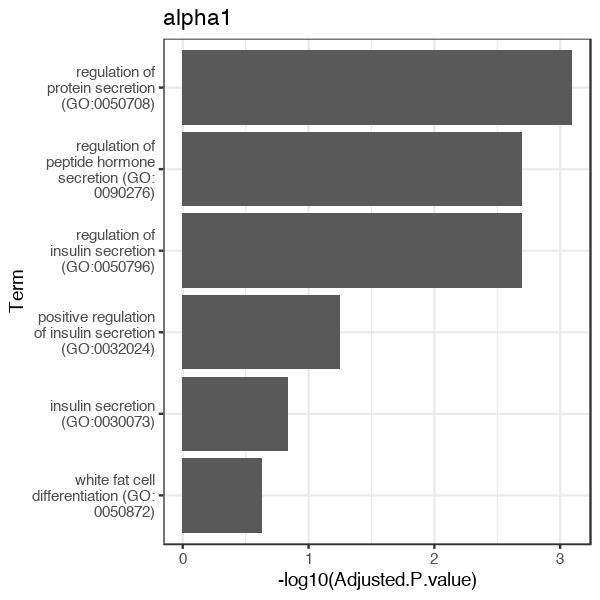

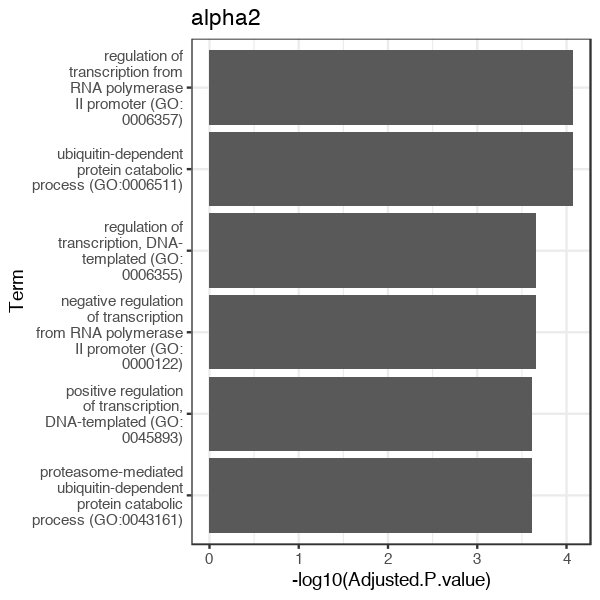

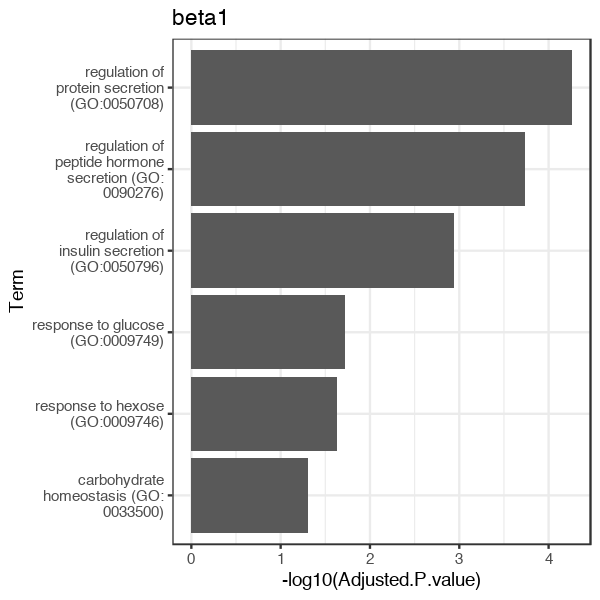

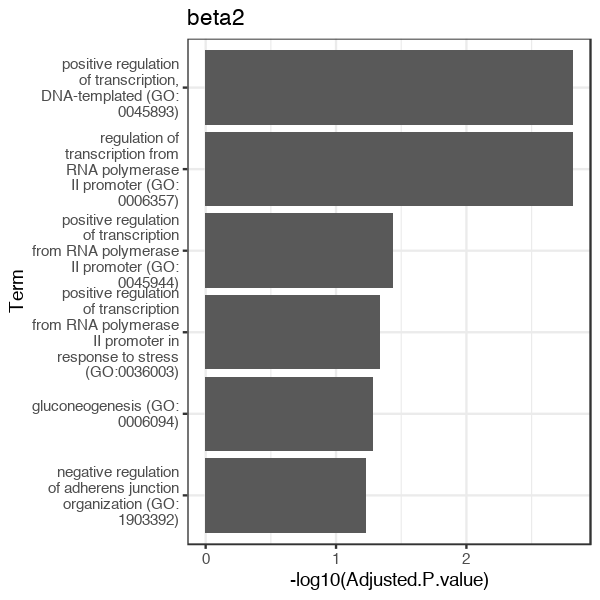

In [45]:
require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(Adjusted.P.value))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Adjusted.P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))


In [66]:
require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
pdf(file='../dat/1901/binary.glist.enrichr.top5.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(Adjusted.P.value))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Adjusted.P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

pdf 
  2

In [64]:
require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
pdf(file='../dat/1901/binary.glist.enrichr.top5_pval.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(P.value))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

pdf 
  2

In [63]:
## combined score 
pdf(file='../dat/1901/binary.glist.enrichr.top5_combinescore.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(desc(Combined.Score)))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,Combined.Score))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

pdf 
  2

## 2. David GO

In [70]:
david.go.res <- list()
for(i in c("alpha1","alpha2","beta1","beta2")){
    res <- read.delim(paste0('../dat/1901/',i,'.txt'),header = T,sep = "\t")[,-1]
    names(res)<- sub("X.","percent",names(res))
    david.go.res[[i]] <- res
}
saveRDS(david.go.res,file = "../dat/1901/david.go.res.Rds")
head(david.go.res$alpha1%>%select(-one_of("Genes")))

Term,Count,percent,PValue,List.Total,Pop.Hits,Pop.Total,Fold.Enrichment,Bonferroni,Benjamini,FDR
GO:0050796~regulation of insulin secretion,7,3.977273,3.154814e-05,153,67,16792,11.466589,0.03010808,0.03010808,0.04963354
GO:0007010~cytoskeleton organization,7,3.977273,3.478052e-03,153,161,16792,4.771810,0.96581975,0.81512099,5.33511352
GO:0035774~positive regulation of insulin secretion involved in cellular response to glucose stimulus,3,1.704545,2.816898e-02,153,29,16792,11.353617,1.00000000,0.99990187,36.21411754
GO:0030036~actin cytoskeleton organization,5,2.840909,3.050759e-02,153,130,16792,4.221217,1.00000000,0.99944997,38.58718248
GO:0007623~circadian rhythm,4,2.272727,3.057885e-02,153,75,16792,5.853420,1.00000000,0.99756712,38.65817773
GO:0030073~insulin secretion,3,1.704545,3.188688e-02,153,31,16792,10.621126,1.00000000,0.99466584,39.94777525


In [56]:
pdf(file='../dat/1901/binary.glist.davidgo.top5_pval.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(PValue))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(PValue)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()

pdf 
  2

In [67]:
pdf(file='../dat/1901/binary.glist.davidgo.top5_padj.Bonferroni.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(Bonferroni))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Bonferroni)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()

pdf 
  2

In [68]:
pdf(file='../dat/1901/binary.glist.davidgo.top5_padj.Benjamini.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(Benjamini))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Benjamini)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()

pdf 
  2

In [69]:
pdf(file='../dat/1901/binary.glist.davidgo.top5_FDR.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(FDR))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(FDR)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()

pdf 
  2